In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data = pd.read_csv('counties.csv')
df = data.copy()

In [3]:
df.head()

,name,fips,state,land_area (km^2),area (km^2),longitude (deg),latitude (deg),noaa/prcp,noaa/snow,noaa/temp,...,"industry/Agriculture, forestry, fishing and hunting/payroll","industry/Agriculture, forestry, fishing and hunting/employees",industry/Utilities/payroll,industry/Utilities/employees,industry/Management of companies and enterprises/payroll,industry/Management of companies and enterprises/employees,industry/Industries not classified/payroll,industry/Industries not classified/employees,"industry/Mining, quarrying, and oil and gas extraction/payroll","industry/Mining, quarrying, and oil and gas extraction/employees"
0,cuming county,31039,NE,1477.641638,1488.343176,-96.787366,41.916346,30.5,28.2,48.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,lancaster county,31109,NE,2169.252486,2192.120047,-96.688211,40.784132,31.0,25.3,51.0,...,730000.0,111.0,8730000.0,95.0,165117000.0,2024.0,150000.0,3.0,NaN,NaN
2,nuckolls county,31129,NE,1489.645186,1491.363670,-98.047277,40.176383,27.7,22.2,51.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,keith county,31101,NE,2749.531887,2874.204062,-101.657059,41.198294,20.0,25.0,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,phelps county,31137,NE,1398.048570,1399.695104,-99.414593,40.513105,25.5,26.7,50.3,...,2557000.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
contains_name = df['name'].isin(['stanislaus county']).any()
contains_name

True

In [5]:
for column in df.columns:
    print(column)

name
fips
state
land_area (km^2)
area (km^2)
longitude (deg)
latitude (deg)
noaa/prcp
noaa/snow
noaa/temp
noaa/altitude
noaa/temp-jan
noaa/temp-apr
noaa/temp-jul
noaa/temp-oct
zip-codes
race/non_hispanic_white_alone_male
race/non_hispanic_white_alone_female
race/black_alone_male
race/black_alone_female
race/asian_alone_male
race/asian_alone_female
race/hispanic_male
race/hispanic_female
age/0-4
age/5-9
age/10-14
age/15-19
age/20-24
age/25-29
age/30-34
age/35-39
age/40-44
age/45-49
age/50-54
age/55-59
age/60-64
age/65-69
age/70-74
age/75-79
age/80-84
age/85+
male
female
population/2010
population/2011
population/2012
population/2013
population/2014
population/2015
population/2016
population/2017
population/2018
population/2019
deaths/suicides
deaths/firearm suicides
deaths/homicides
deaths/vehicle
bls/2004/labor_force
bls/2004/employed
bls/2004/unemployed
bls/2008/labor_force
bls/2008/employed
bls/2008/unemployed
bls/2012/labor_force
bls/2012/employed
bls/2012/unemployed
bls/2016/labor_

# Economic Diversification

In [6]:
# Identify columns representing number of employees in each industry
industry_columns = [col for col in df.columns if 'industry/' in col and 'employees' in col]

# Calculate averages for each industry
industry_averages = df[industry_columns].mean()

# Count industries in each county where job numbers are above average
df['diversification_score'] = (df[industry_columns] > industry_averages).sum(axis=1)

# Sort counties by diversification score
diversified_counties = df.sort_values(by='diversification_score', ascending=False)

# Display the top 5 diversified counties
print(diversified_counties[['name', 'diversification_score']].head())

                  name  diversification_score
489     ventura county                     20
1597  salt lake county                     20
3122   maricopa county                     20
3123       pima county                     20
410      denton county                     20


In [7]:
# Filter to include only counties with a diversification score of 20
top_diversified_counties = diversified_counties[diversified_counties['diversification_score'] == 20]

# Display all counties with a diversification score of 20, including their state
print(top_diversified_counties[['name', 'state', 'diversification_score']])

                       name state  diversification_score
489          ventura county    CA                     20
1597       salt lake county    UT                     20
3122        maricopa county    AZ                     20
3123            pima county    AZ                     20
410           denton county    TX                     20
2599            cook county    IL                     20
532           orange county    CA                     20
508   san bernardino county    CA                     20
2473      miami-dade county    FL                     20
808        jefferson county    AL                     20
1435       jefferson county    CO                     20
338          tarrant county    TX                     20
333           harris county    TX                     20
1439          denver county    CO                     20
2562           clark county    NV                     20
490      los angeles county    CA                     20


In [8]:
top_diversified_counties.count()

name                                                                16
fips                                                                16
state                                                               16
land_area (km^2)                                                    16
area (km^2)                                                         16
                                                                    ..
industry/Industries not classified/payroll                          16
industry/Industries not classified/employees                        16
industry/Mining, quarrying, and oil and gas extraction/payroll      16
industry/Mining, quarrying, and oil and gas extraction/employees    16
diversification_score                                               16
Length: 238, dtype: int64

In [9]:
state_counts = top_diversified_counties['state'].value_counts()

<BarContainer object of 9 artists>

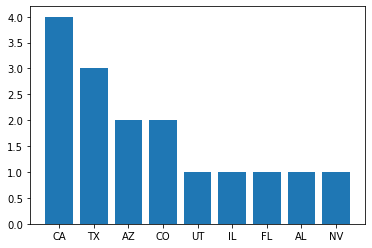

In [10]:
# A count of 'perfect' economic diversification scores, aggregated by state

plt.bar(state_counts.index,state_counts.values)

# Climate and Agriculture

Rainfall vs Ag Employees

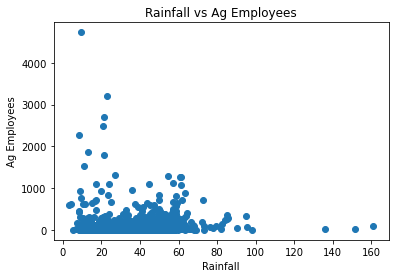

In [11]:
plt.scatter(df['noaa/prcp'], df['industry/Agriculture, forestry, fishing and hunting/employees'])
plt.xlabel('Rainfall')
plt.ylabel('Ag Employees')
plt.title('Rainfall vs Ag Employees')
plt.show()

In [12]:
rainfall_vs_ag_employees_pearson_correlation = df['noaa/prcp'].corr(df['industry/Agriculture, forestry, fishing and hunting/employees'], method='pearson')
round(rainfall_vs_ag_employees_pearson_correlation, 5)

-0.05876

In [13]:
rainfall_vs_ag_employees_spearman_correlation = df['noaa/prcp'].corr(df['industry/Agriculture, forestry, fishing and hunting/employees'], method='spearman')
round(rainfall_vs_ag_employees_spearman_correlation, 5)

0.18387

Rainfall vs Ag Payroll

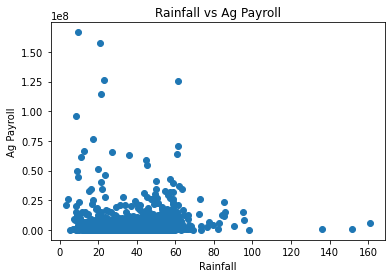

In [14]:
plt.scatter(df['noaa/prcp'], df['industry/Agriculture, forestry, fishing and hunting/payroll'])
plt.xlabel('Rainfall')
plt.ylabel('Ag Payroll')
plt.title('Rainfall vs Ag Payroll')
plt.show()

In [15]:
rainfall_vs_ag_payroll_pearson_correlation = df['noaa/prcp'].corr(df['industry/Agriculture, forestry, fishing and hunting/payroll'], method='pearson')
round(rainfall_vs_ag_payroll_pearson_correlation, 5)

-0.03906

In [16]:
rainfall_vs_ag_payroll_spearman_correlation = df['noaa/prcp'].corr(df['industry/Agriculture, forestry, fishing and hunting/payroll'], method='spearman')
round(rainfall_vs_ag_payroll_spearman_correlation, 5)

0.16087

Strange outlier identified: Kern County has roughly a thousand more employees than the penultimate county. They also have the highest payroll (understandably).

In [17]:
max_employees_index = df['industry/Agriculture, forestry, fishing and hunting/employees'].idxmax()
max_employees_row = df.loc[[max_employees_index]]

max_employees_row

,name,fips,state,land_area (km^2),area (km^2),longitude (deg),latitude (deg),noaa/prcp,noaa/snow,noaa/temp,...,"industry/Agriculture, forestry, fishing and hunting/employees",industry/Utilities/payroll,industry/Utilities/employees,industry/Management of companies and enterprises/payroll,industry/Management of companies and enterprises/employees,industry/Industries not classified/payroll,industry/Industries not classified/employees,"industry/Mining, quarrying, and oil and gas extraction/payroll","industry/Mining, quarrying, and oil and gas extraction/employees",diversification_score
517,kern county,6029,CA,21062.393794,21141.164328,-118.755444,35.335304,9.6,2.3,61.6,...,4734.0,154033000.0,1351.0,224995000.0,2062.0,524000.0,24.0,702704000.0,6959.0,19


In [18]:
max_payroll_index = df['industry/Agriculture, forestry, fishing and hunting/payroll'].idxmax()
max_payroll_row = df.loc[[max_employees_index]]

max_payroll_row

,name,fips,state,land_area (km^2),area (km^2),longitude (deg),latitude (deg),noaa/prcp,noaa/snow,noaa/temp,...,"industry/Agriculture, forestry, fishing and hunting/employees",industry/Utilities/payroll,industry/Utilities/employees,industry/Management of companies and enterprises/payroll,industry/Management of companies and enterprises/employees,industry/Industries not classified/payroll,industry/Industries not classified/employees,"industry/Mining, quarrying, and oil and gas extraction/payroll","industry/Mining, quarrying, and oil and gas extraction/employees",diversification_score
517,kern county,6029,CA,21062.393794,21141.164328,-118.755444,35.335304,9.6,2.3,61.6,...,4734.0,154033000.0,1351.0,224995000.0,2062.0,524000.0,24.0,702704000.0,6959.0,19


Temp vs Ag Employees

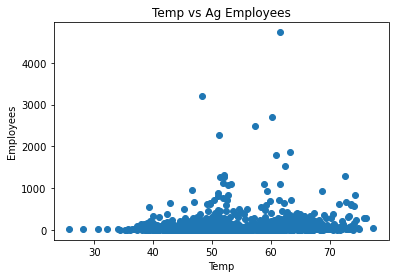

In [19]:
plt.scatter(df['noaa/temp'], df['industry/Agriculture, forestry, fishing and hunting/employees'])
plt.xlabel('Temp')
plt.ylabel('Employees')
plt.title('Temp vs Ag Employees')
plt.show()

In [20]:
temp_vs_ag_employees_pearson_correlation = df['noaa/temp'].corr(df['industry/Agriculture, forestry, fishing and hunting/employees'], method='pearson')
round(temp_vs_ag_employees_pearson_correlation, 5)

0.08812

In [21]:
temp_vs_ag_employees_spearman_correlation = df['noaa/temp'].corr(df['industry/Agriculture, forestry, fishing and hunting/employees'], method='spearman')
round(temp_vs_ag_employees_spearman_correlation, 5)

0.22059

Temp vs Payroll

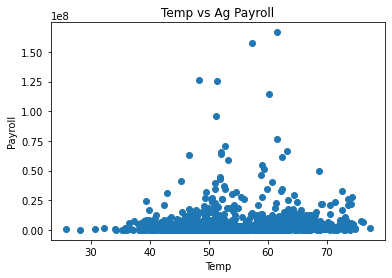

In [22]:
plt.scatter(df['noaa/temp'], df['industry/Agriculture, forestry, fishing and hunting/payroll'])
plt.xlabel('Temp')
plt.ylabel('Payroll')
plt.title('Temp vs Ag Payroll')
plt.show()

In [23]:
temp_vs_ag_payroll_pearson_correlation = df['noaa/temp'].corr(df['industry/Agriculture, forestry, fishing and hunting/payroll'], method='pearson')
round(temp_vs_ag_payroll_pearson_correlation, 5)

0.06901

In [24]:
temp_vs_ag_payroll_spearman_correlation = df['noaa/temp'].corr(df['industry/Agriculture, forestry, fishing and hunting/payroll'], method='spearman')
round(temp_vs_ag_payroll_spearman_correlation, 5)

0.20365

Seaborn heat maps of correlation scores

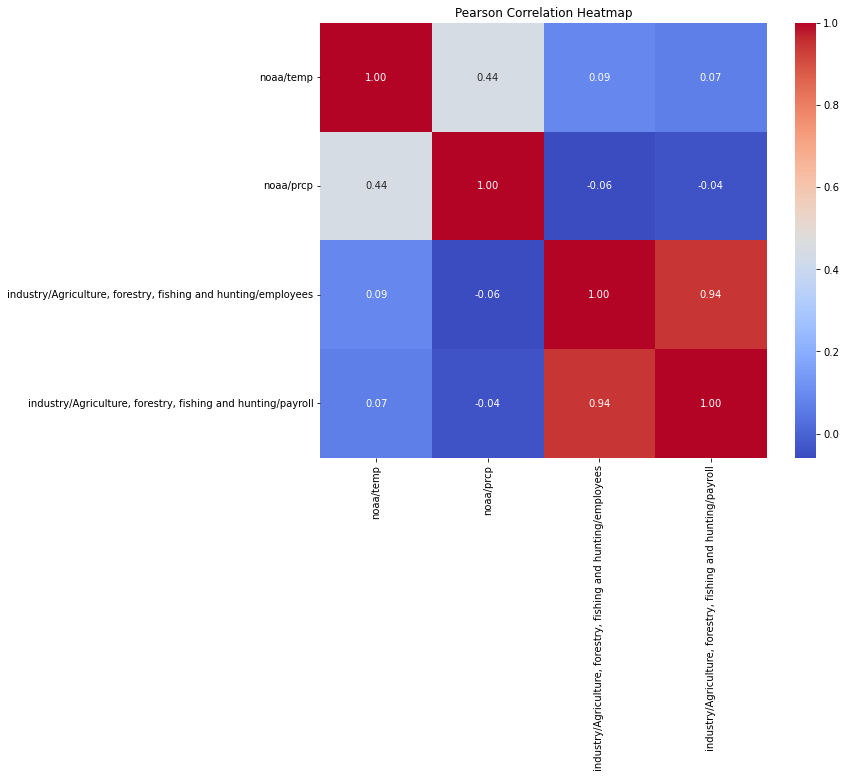

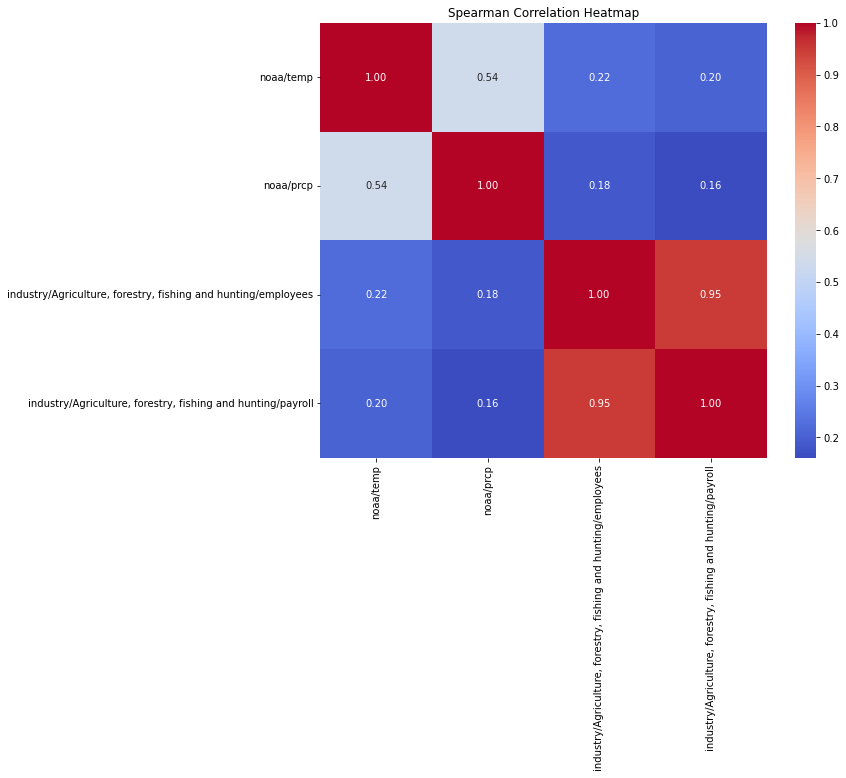

In [25]:
# Selecting the specified columns for the heatmap
selected_columns = [
    'noaa/temp', 
    'noaa/prcp', 
    'industry/Agriculture, forestry, fishing and hunting/employees', 
    'industry/Agriculture, forestry, fishing and hunting/payroll'
]
heatmap_data = data[selected_columns]

# Calculating the Pearson correlation matrix
pearson_corr = heatmap_data.corr(method='pearson')

# Calculating the Spearman correlation matrix
spearman_corr = heatmap_data.corr(method='spearman')

# Plotting the Pearson correlation heatmap
plt.figure(figsize=(10, 8))
plt.title('Pearson Correlation Heatmap')
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Plotting the Spearman correlation heatmap
plt.figure(figsize=(10, 8))
plt.title('Spearman Correlation Heatmap')
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

# Patterns in Industry

Finding counties with dominant (more than 50% market share) industries

In [26]:
dominance_threshold = 0.5

# Filter columns related to industry employment
industry_employment_columns = [col for col in data.columns if '/employees' in col]
industry_data = data[['name'] + industry_employment_columns]

# Creating a copy of the DataFrame to avoid SettingWithCopyWarning
industry_data_copy = industry_data.copy()

# Calculate the total employment for each county across all industries in the copy
industry_data_copy['total_employment'] = industry_data_copy[industry_employment_columns].sum(axis=1)

# Calculate the proportion of employment for each industry in each county in the copy
for col in industry_employment_columns:
    industry_data_copy[col + '_prop'] = industry_data_copy[col] / industry_data_copy['total_employment']

# Using the updated DataFrame to identify counties with dominant industries
dominant_industry_counties_copy = []
for index, row in industry_data_copy.iterrows():
    for col in industry_employment_columns:
        if row[col + '_prop'] > dominance_threshold:
            dominant_industry_counties_copy.append((row['name'], col, row[col + '_prop']))

# Convert the list to a DataFrame for better readability
dominant_industry_df_copy = pd.DataFrame(dominant_industry_counties_copy, columns=['County', 'Dominant Industry', 'Proportion'])

# Sort the DataFrame by 'Proportion' in descending order
dominant_industry_df_copy_sorted = dominant_industry_df_copy.sort_values('Proportion', ascending=False)

# Display the sorted DataFrame
dominant_industry_df_copy_sorted


,County,Dominant Industry,Proportion
12,buffalo county,industry/Health care and social assistance/emp...,1.000000
4,blaine county,industry/Construction/employees,1.000000
27,kent county,industry/Retail trade/employees,1.000000
25,terrell county,industry/Retail trade/employees,1.000000
66,issaquena county,industry/Wholesale trade/employees,1.000000
...,...,...,...
127,winnebago county,industry/Manufacturing/employees,0.505234
37,carroll county,industry/Manufacturing/employees,0.505141
83,noble county,industry/Manufacturing/employees,0.504278
93,carroll county,industry/Manufacturing/employees,0.503038


In [27]:
# sns.heatmap(dominant_industry_df_copy['Proportion'], 
#             annot=True,      # Annotate cells with data values; set to False if you don't want annotations
#             cmap='coolwarm', # Color map for the heatmap
#             cbar=True,       # Display a color bar; set to False if you don't want it
#             fmt='.2f',       # Format for annotation strings (if annot is True)
#             linewidths=.5,   # Line width between cells
#             linecolor='black' # Line color between cells
#             )

# plt.show() # Display the heatmap

# Corr Checks

In [28]:
for col in data:
    print(col)

name
fips
state
land_area (km^2)
area (km^2)
longitude (deg)
latitude (deg)
noaa/prcp
noaa/snow
noaa/temp
noaa/altitude
noaa/temp-jan
noaa/temp-apr
noaa/temp-jul
noaa/temp-oct
zip-codes
race/non_hispanic_white_alone_male
race/non_hispanic_white_alone_female
race/black_alone_male
race/black_alone_female
race/asian_alone_male
race/asian_alone_female
race/hispanic_male
race/hispanic_female
age/0-4
age/5-9
age/10-14
age/15-19
age/20-24
age/25-29
age/30-34
age/35-39
age/40-44
age/45-49
age/50-54
age/55-59
age/60-64
age/65-69
age/70-74
age/75-79
age/80-84
age/85+
male
female
population/2010
population/2011
population/2012
population/2013
population/2014
population/2015
population/2016
population/2017
population/2018
population/2019
deaths/suicides
deaths/firearm suicides
deaths/homicides
deaths/vehicle
bls/2004/labor_force
bls/2004/employed
bls/2004/unemployed
bls/2008/labor_force
bls/2008/employed
bls/2008/unemployed
bls/2012/labor_force
bls/2012/employed
bls/2012/unemployed
bls/2016/labor_

In [29]:
# Making a column for total deaths by police shootings
columns_to_sum = [
    'fatal_police_shootings/total-2017',
    'fatal_police_shootings/total-2018',
    'fatal_police_shootings/total-2019',
    'fatal_police_shootings/total-2020'
]

data['sum_fatal_police_shootings'] = data[columns_to_sum].sum(axis=1)
data['sum_fatal_police_shootings'].sum()

3978.0

In [30]:
corr_check_fields = [col for col in data.columns if 'zip-code' in col or 'age' in col or 'life-expectancy' in col or 'sum_fatal_police_shootings' in col or 'avg_income' in col or 'edu/bachelors+' in col or 'poverty-rate' in col or 'cost-of-living' in col or 'payroll' in col or 'employees' in col or 'Smokers' in col or 'Obesity' in col or 'Inactive' in col or 'Drinking' in col or 'male' in col or 'female' in col or 'bls/2020' in col or 'elections' in col]

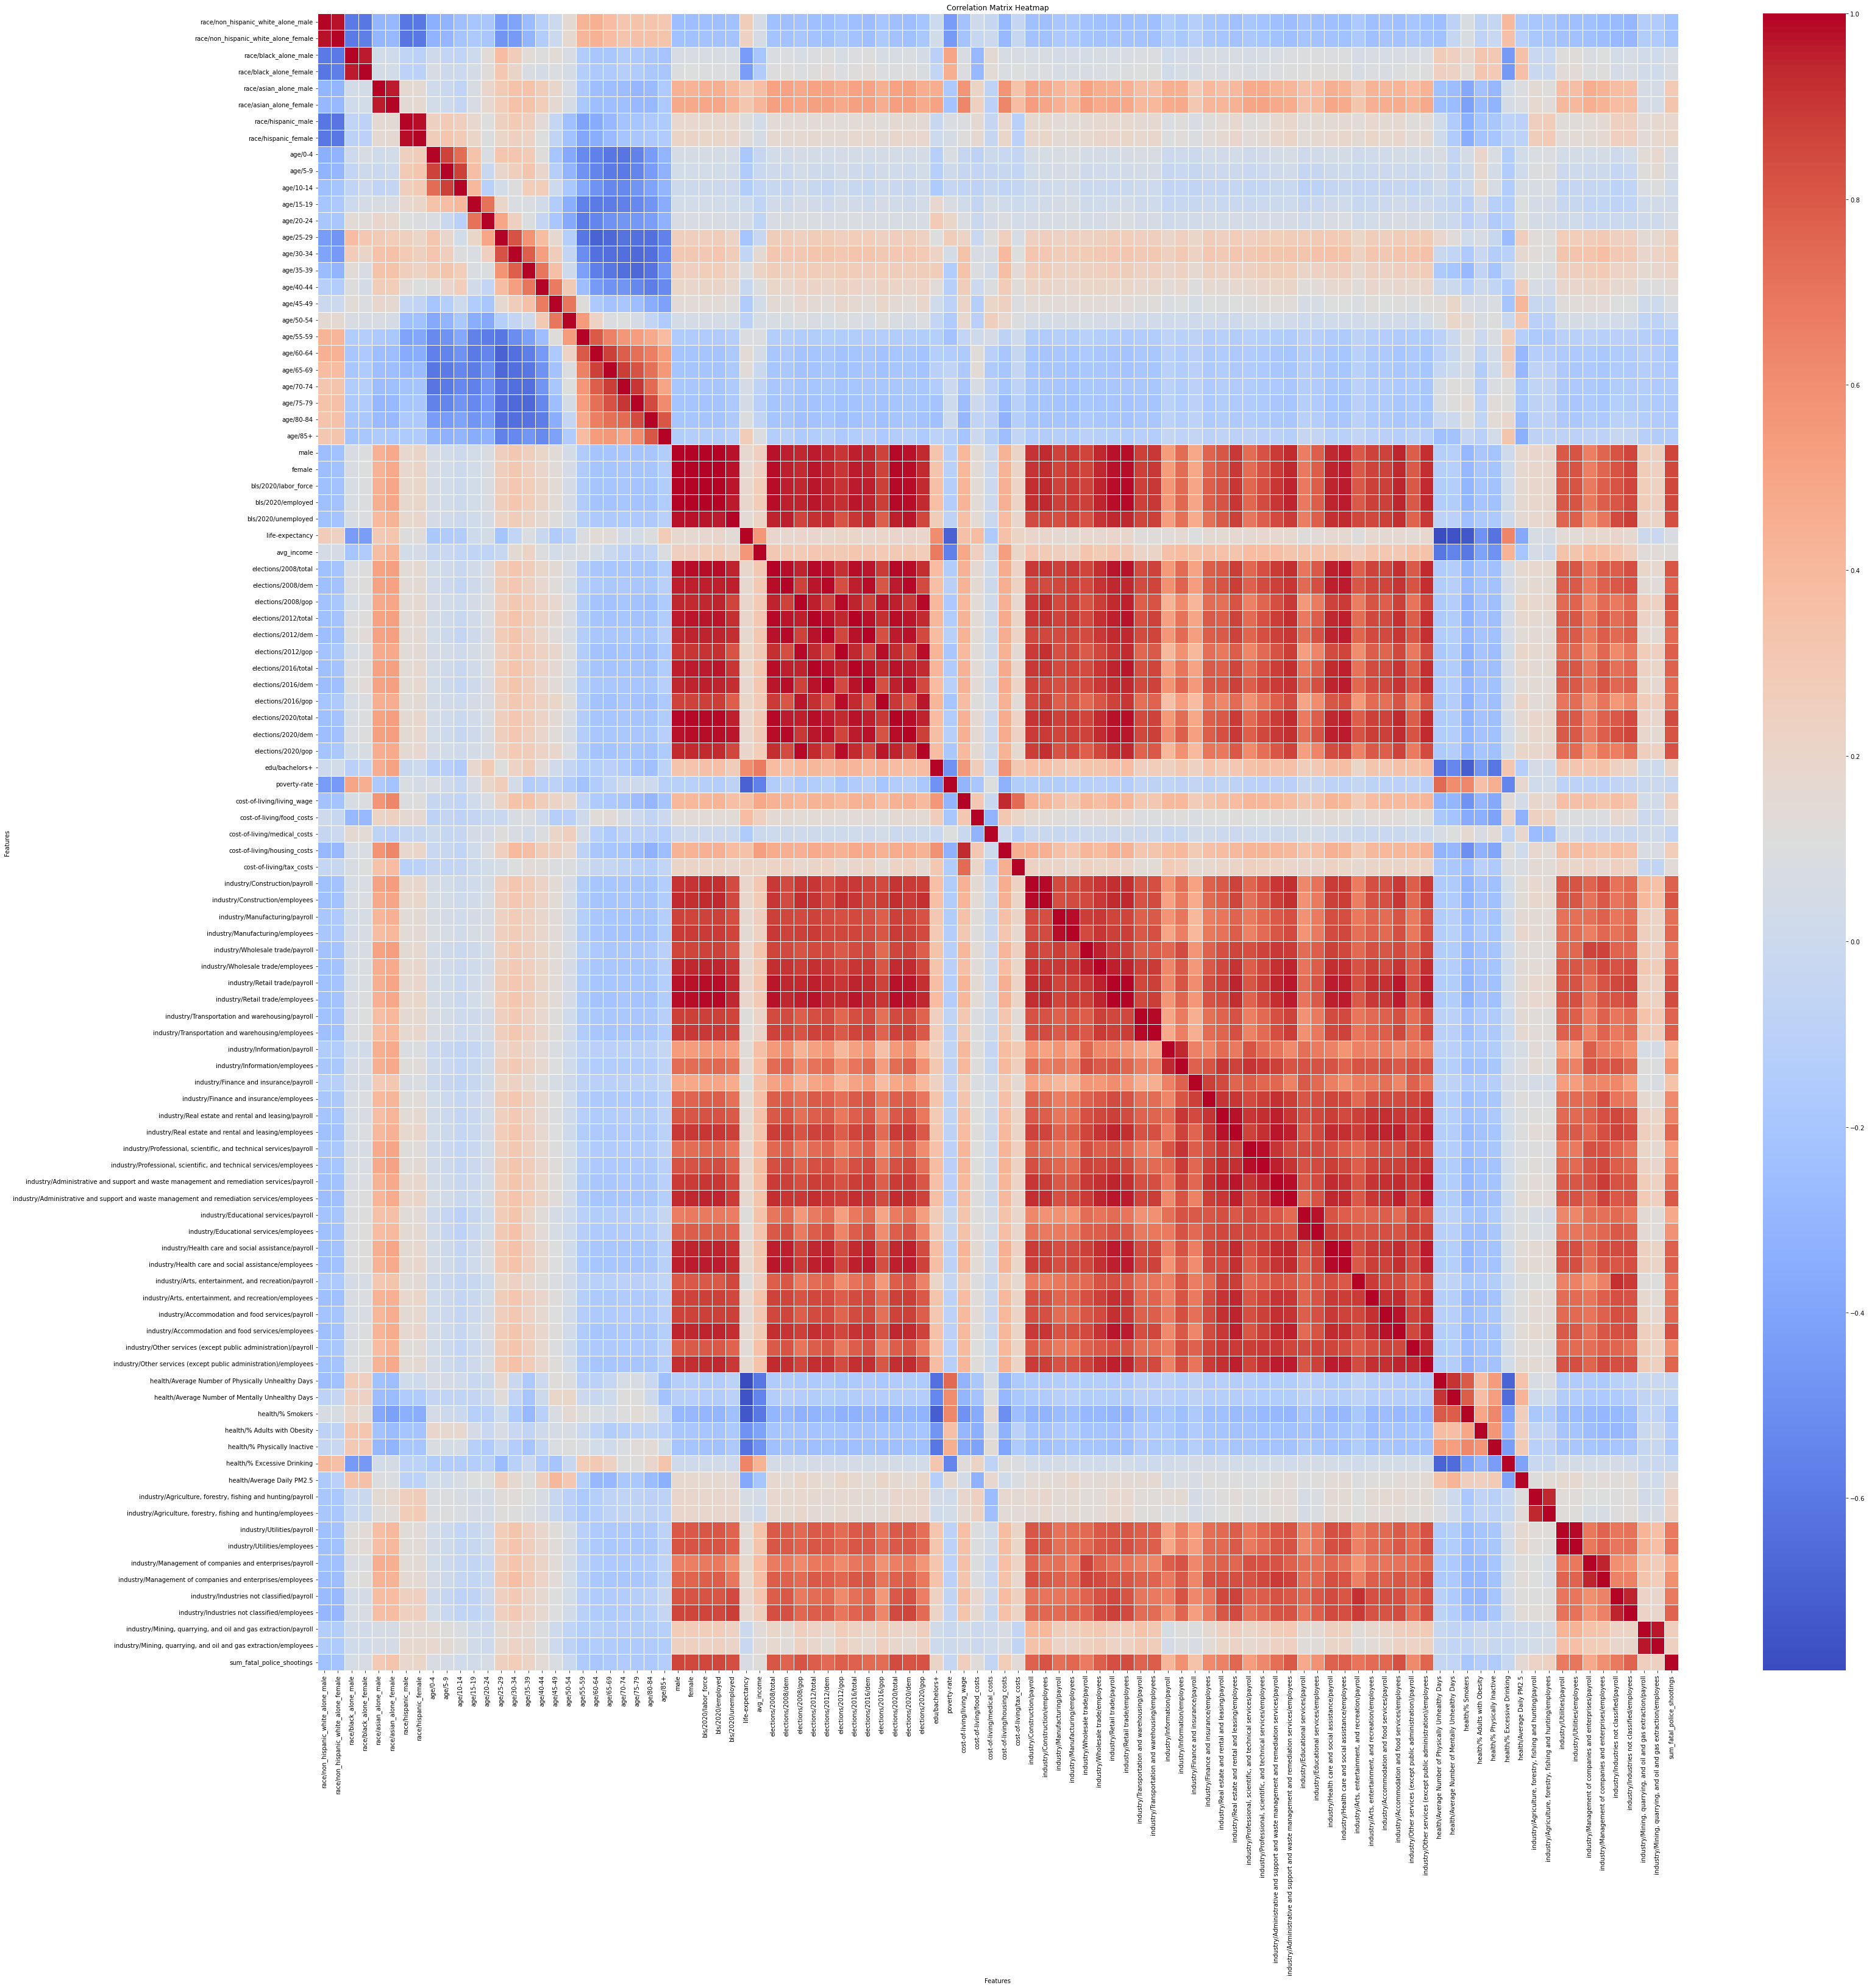

In [31]:
corr_matrix = data[corr_check_fields].corr()

# Set up the figure for the heatmap
plt.figure(figsize=(50, 50))

# Create the heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')

# Save the heatmap to a file before displaying it
plt.savefig('country_corr_heatmap.jpg', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

# Close the plot to free up memory
plt.close()

In [32]:
corr_matrix.to_excel('correlation_matrix.xlsx')